## 1. Import Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Slider
from sklearn import cluster ,datasets

In [2]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [7]:
# 1500개의 sample을 (std가 각기 다른) 3개의 cluster로 나누기
# make_blobs의 반환값은 'sample(x,y)' & 'sample의 label(0 / 1 / 2 중)'

datasets.make_blobs(n_samples=1500, cluster_std=[1.0, 2.5, 0.5], random_state=170)

(array([[ -6.11119721,   1.47153062],
        [ -7.49665361,   0.9134251 ],
        [-10.84489837,  -7.55352273],
        ...,
        [  1.64990343,  -0.20117787],
        [  0.79230661,   0.60868888],
        [  1.91226342,   0.25327399]]), array([1, 1, 0, ..., 2, 2, 2]))

In [8]:
# return 값 중, 앞부분 (x,y)
varied = pd.DataFrame(datasets.make_blobs(n_samples=1500, cluster_std=[1.0, 2.5, 0.5], random_state=170)[0])
varied.head()

,0,1
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780


## 2. Clustering with Agglomerative Clustering

In [16]:
agnes =pd.DataFrame([cluster.AgglomerativeClustering(n_clusters=i).fit(varied).labels_ for i in range(1,8)])
agnes.index = agnes.index+1

agnes

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,1,0,0,2,1,1,1,2,...,0,0,2,1,2,1,0,2,2,2
4,1,0,3,0,1,2,3,3,3,2,...,1,1,2,3,2,3,1,2,2,2
5,0,4,1,3,0,2,1,1,1,2,...,0,0,2,1,2,1,0,2,2,2
6,0,4,1,3,2,5,1,1,1,5,...,0,0,5,1,5,1,0,5,5,5
7,3,4,0,1,2,5,0,0,0,5,...,3,6,5,0,5,0,3,5,5,5


In [17]:
agnes2 = agnes

In [18]:
agnes2.iloc[5,:] = agnes.iloc[6,:].map({0:0,1:1,2:2,3:3,4:4,5:5,6:3})

In [19]:
agnes2.iloc[4,:] = agnes.iloc[5,:].map({0:0,1:1,2:2,3:2,4:4,5:5,6:3})

In [20]:
agnes2.iloc[3,:] = agnes.iloc[4,:].map({0:0,1:1,2:2,3:2,4:1,5:5,6:3})

In [21]:
agnes2.iloc[2,:] = agnes.iloc[3,:].map({0:0,1:2,2:2,3:2,4:1,5:5,6:3})

In [22]:
agnes2.iloc[1,:] = agnes.iloc[2,:].map({0:0,1:2,2:2,3:2,4:1,5:2,6:3})

In [23]:
agnes2.iloc[0,:] = agnes.iloc[1,:].map({0:2,1:2,2:2,3:2,4:1,5:2,6:3})

In [24]:
agnes2

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2,2,0,2,2,2,0,0,0,2,...,2,2,2,0,2,0,2,2,2,2
3,2,2,0,2,2,5,0,0,0,5,...,2,2,5,0,5,0,2,5,5,5
4,2,1,0,1,2,5,0,0,0,5,...,2,2,5,0,5,0,2,5,5,5
5,2,4,0,1,2,5,0,0,0,5,...,2,2,5,0,5,0,2,5,5,5
6,3,4,0,1,2,5,0,0,0,5,...,3,3,5,0,5,0,3,5,5,5
7,3,4,0,1,2,5,0,0,0,5,...,3,6,5,0,5,0,3,5,5,5


### visualization

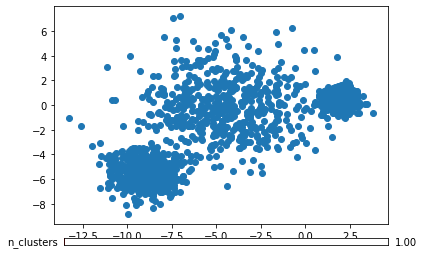

In [25]:
fig = plt.figure()

val = 30
agnes =cluster.AgglomerativeClustering(n_clusters=val)

col=agnes.fit(varied).labels_
cmap = cm.ScalarMappable(colors.Normalize(0,7),cm.rainbow)

line = plt.scatter(varied.iloc[:,0],varied.iloc[:,1])
ax = plt.axes([0.15,0.05,0.75,0.025])

slider = Slider(ax,label = 'n_clusters',valmax = 7, valmin = 1,valstep=1,valinit=1)

def updata(val) :
    col = agnes2.iloc[int(val)-1,:]
    line.set_color(cmap.to_rgba(col))
    fig.canvas.draw_idle()
slider.on_changed(updata)

plt.show()